In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.model_selection import train_test_split

# (6th Assinment) Implementation of SGD

---



** - > using sklean sgd**

---



**Get the data**

---



In [173]:
boston = load_boston()
boston.data.shape

(506, 13)

In [174]:
columnNames = boston.feature_names
print(columnNames)
Data = pd.DataFrame(boston.data, columns = columnNames)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [175]:
Data_Labels = boston.target
Data_Labels.shape
#print(Data_Labels)

(506,)

In [176]:
Data["PRICE"] = Data_Labels
print(Data.shape)
print(Data.head(2))

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO      B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.9   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.9   9.14   21.6

[2 rows x 14 columns]


****Replace nan values****

---



In [177]:
Data.isnull().sum()
Data.isnull().values.any()

False

In [178]:
Data.apply(lambda x: x.fillna(x.mean()),axis=0)
print('done')

done


**Train_test_split**

---



In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(Data, Data["PRICE"],test_size = 0.2)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
print(X_train.head(10))

         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
334   0.03738   0.0   5.19   0.0  0.515  ...  224.0     20.2  389.40   6.75   20.7
287   0.03871  52.5   5.32   0.0  0.405  ...  293.0     16.6  396.90   7.14   23.2
164   2.24236   0.0  19.58   0.0  0.605  ...  403.0     14.7  395.11  11.64   22.7
225   0.52693   0.0   6.20   0.0  0.504  ...  307.0     17.4  382.00   4.63   50.0
444  12.80230   0.0  18.10   0.0  0.740  ...  666.0     20.2  240.52  23.79   10.8
299   0.05561  70.0   2.24   0.0  0.400  ...  358.0     14.8  371.58   4.74   29.0
159   1.42502   0.0  19.58   0.0  0.871  ...  403.0     14.7  364.31   7.39   23.3
289   0.04297  52.5   5.32   0.0  0.405  ...  293.0     16.6  371.72   9.51   24.8
70    0.08826   0.0  10.81   0.0  0.413  ...  305.0     19.2  383.73   6.72   24.2
84    0.05059   0.0   4.49   0.0  0.449  ...  247.0     18.5  396.90   9.62   23.9

[10 rows x 14 columns]


In [206]:
Y_train.isnull().sum()

0

# use our implementation of the sgd

**Implementation of  Stochastic Gradient Descent by taking 10 random samples**

---



1.**First Standadize the data**

---



In [0]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
std_scale = scaler.fit(X_train[['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']])

train_standadized= std_scale.transform(X_train[['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']])

test_standadized= std_scale.transform(X_test[['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']])


In [0]:
X_train_standadized = pd.DataFrame(train_standadized, columns = columnNames)
X_test_standadized = pd.DataFrame(test_standadized, columns = columnNames)
# X_train_standadized['PRICE']=X_train['PRICE']
# test_standadized['PRICE']=X_test['PRICE']
# print(X_train_standadized.head(2))

In [0]:
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [210]:
print(Y_train)
print(Y_train.shape)
print(X_train_standadized.shape)

[20.7 23.2 22.7 50.  10.8 29.  23.3 24.8 24.2 23.9 10.9 21.7 43.5 20.3
 18.7 36.2 26.6 14.1 14.9 42.8 20.1 16.1 25.3 24.1 19.8 23.2 13.4 22.6
 25.  21.9 18.1  7.2  5.  21.7 18.8 17.3 25.2 20.8 20.5 36.  27.1 21.4
 30.1 24.6 28.7 18.9 14.5 23.  20.  24.3 13.2 14.5 19.5 27.5 27.5 10.9
 20.1 24.5 48.8 21.2 35.2 23.1 20.6 29.  14.4  8.3  9.5 20.3 17.7 19.6
 13.5 12.7 35.4 28.4 29.6 26.2 20.7 50.  19.1 17.2  8.8 26.6 17.5  9.6
 33.4 18.8 16.5 46.  15.2 27.1  8.5 48.3 50.  22.6 22.  19.6 19.8 17.8
 21.5 22.8 22.9 13.3 24.4 29.4  8.8 13.9 11.9 23.   7.4 21.7  7.2 33.
 37.6 23.2 23.9 13.3 23.8 18.5 23.5 27.  16.1 20.8 16.3 13.8 19.3 19.9
 15.  18.2 17.5 14.3 27.5 50.  19.1 15.6 10.2  8.7 24.3 15.6 36.4 15.4
 16.2 15.4 20.4 19.4 10.2 17.6 13.1 24.7 23.1 20.2 21.2 33.2 34.6 20.3
 22.5 17.8 19.1 17.5 23.7 18.2 21.   7.5 19.6 19.8 24.  36.5 18.7 22.2
 34.9 34.9 19.4 36.2 13.5 37.2  5.  16.1 24.8 21.9 23.  50.  32.9 28.5
 20.1 28.  16.4 11.7 23.1 27.9 23.1 28.7 22.5 21.9 43.1 18.3 14.3 22.
 19.9 24

In [0]:
X_train_standadized['PRICE']=Y_train
X_test_standadized['PRICE']=Y_test

In [212]:
print(X_train_standadized.shape)
print(X_test_standadized.shape)

(404, 14)
(102, 14)


In [214]:
# X_train_standadized.isnull()
# X_train_standadized.fillna(X_train_standadized.mean())
X_train_standadized.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

**Sgd**

---



In [216]:
# for references
#https://github.com/gauravtheP/Implementing-Stochastic-Gradient-Descent/blob/master/LinearRegression_SGD_BostonHomePrices.ipynb


#First step initilize the weights and b
#formla of slope s=mx+b.
# mx is the weights*x1....weights_d*xd
# b is the intercept term

m = X_train.shape[0]
weight = np.random.randn(13)*np.sqrt(2/m)   # defining initial random weight from normal distribution
b = np.random.randn(1)*np.sqrt(2/m)   # generating initial random y-intercept from normal distribution

# initilize learing rate
learningRate = 0.2
print(m,weight,b,learningRate)



for i in range(2000):    # running 2000 iterations
    Data_batch_10 = X_train_standadized.sample(n = 10)   # taking 10 stochastic samples
    X_temp = Data_batch_10.drop("PRICE", axis = 1, inplace = False)    # DROP the price label, because this is the output label we have to predict. 
    #X = pd.DataFrame(X_temp, columns = columnNames)
    X=X_temp
    Y = Data_batch_10["PRICE"]
    PartialGradient = np.empty(13)# in this we store the partial derivate with respect to w...we have 13 features
    sum2 = 0
    
    # Update the weights-------------------------------
    
    # formula  (w0=w1-lr*derivate)in every iteration
    # step 1.
    #First calculate the derivative 
    
    for j in range(13):     # as there are 13 dimensions in our dataset and dimensions of weight should also be same as dimension of our dataset
        sum1 = 0
        for k in range(10):
            sum1 += -2 * X.iloc[k][j] * (Y.iloc[k] - np.dot(weight, X.iloc[k]) - b)  # this is a derivative of linear regression w.r.t 'w
        PartialGradient[j] = sum1
        
    # step 2. 
    
    #multiply with learning rate
    PartialGradient *= learningRate


    #step 3.
    #Update the weights
  
    for l in range(13):
        weight[l] -= PartialGradient[l]  # updating weights
        
    
    
    # Update the Intercepts or (b's)-------------------------------
        
    for m in range(10):
        sum2 += -2 * (Y.iloc[m]- np.dot(weight, X.iloc[m]) - b)     # this is the derivative of linear regression w.r.t 'b'
    b = b - learningRate * sum2       #updating y-intercept 'b'
    

    # in every iteration u have to reduce the learing rate bro
    learningRate = 0.01 / pow(i+1, 0.25)     #learning rate at every iteration
    
    
    # just add the regularization term to it
    
    weight = weight + 0.0001*np.dot(weight, weight)   #adding l2 regularization
    b = b + 0.0001*np.dot(weight, weight) #adding L2 regularization

print("Weight = "+str(weight))
print("b = "+str(b))

404 [-0.05070079  0.0712384   0.08144204  0.07292133  0.08974328 -0.02311549
  0.05826553  0.06273903  0.03671033  0.08477603 -0.03625468 -0.01312975
  0.02192867] [0.05113992] 0.2
Weight = [-0.37323154  1.12154017  0.33532632  0.9809546  -1.56284412  2.96585827
  0.2735731  -2.06909773  2.44753151 -2.04799992 -1.92889464  1.37829867
 -3.571989  ]
b = [22.50551]


In [0]:
# time for testdata.. with our updated weights and coeffcients

import math
test_temp = X_test_standadized.drop("PRICE", axis = 1, inplace = False)
test_data = test_temp
test_labels = Y_test
y_predicted = []


for i in range(102):
    test_i = 0
    test_i = np.dot(weight, test_data.iloc[i]) + b[0]  #making prediction by using optimize values of weights obtained from SGD
    y_predicted.append(test_i)
    


In [218]:
#Make the preditions  


d1 = {'True Labels': Y_test, 'Predicted Labels': y_predicted}
df1 = pd.DataFrame(data = d1)


,True Labels,Predicted Labels
0,37.9,33.334242
1,17.4,21.800972
2,32.0,33.397457
3,21.4,23.868016
4,24.0,24.482675
5,10.5,7.064670
6,32.5,30.260659
7,16.2,20.378662
8,13.8,6.204524
9,31.2,29.220315


In [219]:
Mean_Sq_Error = mean_squared_error(Y_test, y_predicted)
print(Mean_Sq_Error)

24.68779995681416


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


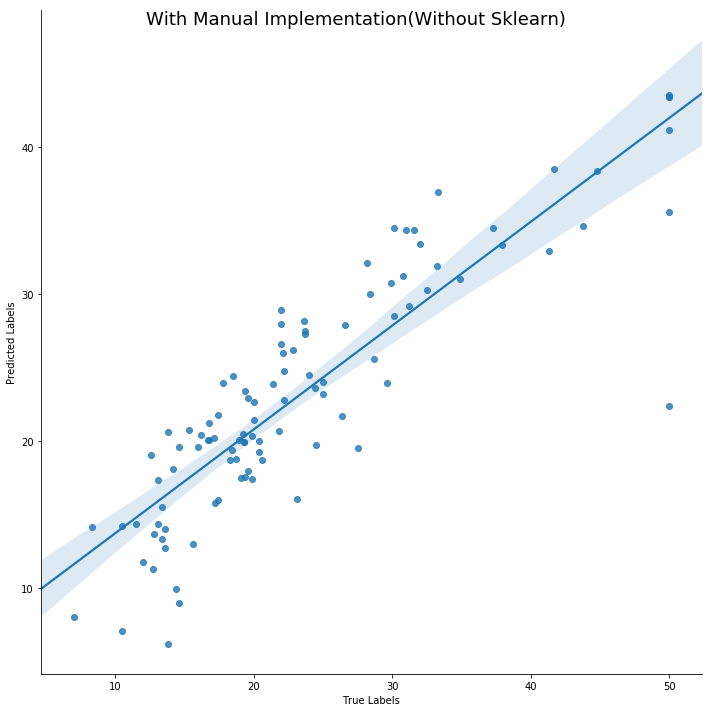

In [220]:
import seaborn as sns
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df1, size = 10)

fig1 = lm1.fig 

fig1.suptitle("With Manual Implementation(Without Sklearn)", fontsize=18)

sns.set(font_scale = 1.5)

**Sklearn implementation**

In [223]:
X_temp = X_train_standadized.drop("PRICE", axis = 1, inplace = False)
X=X_temp
Y = Y_train

X_test_temp = X_test_standadized.drop("PRICE", axis = 1, inplace = False)
X_te=X_test_temp
Y_te = Y_test

clf = SGDRegressor(shuffle = False, learning_rate= 'invscaling', max_iter = 2000)
clf.fit(X, Y)# fir train data

Y_pred = clf.predict(X_te)# predict test error

print("Weight = "+str(clf.coef_))
print("Y Intercept = "+str(clf.intercept_))

Weight = [-0.92923444  0.80810734 -0.02142847  0.81761804 -2.02014517  2.46852323
 -0.02994358 -2.91655848  2.16393634 -1.33702632 -2.17771005  0.90810995
 -3.66821822]
Y Intercept = [22.30660382]


In [224]:
d2 = {'True Labels': Y_te, 'Predicted Labels': Y_pred}
df2 = pd.DataFrame(data = d2)
df2

,True Labels,Predicted Labels
0,37.9,33.114366
1,17.4,22.728829
2,32.0,32.951590
3,21.4,24.724204
4,24.0,25.072981
5,10.5,6.692912
6,32.5,30.351692
7,16.2,20.520831
8,13.8,6.607847
9,31.2,28.303887


In [225]:
Mean_Sq_Error = mean_squared_error(Y_te, Y_pred)
Mean_Sq_Error

25.072849774836367

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


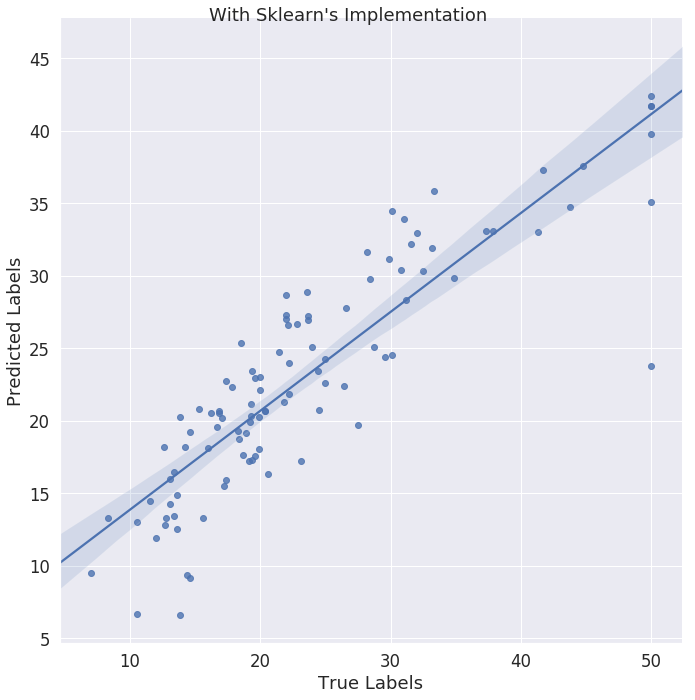

In [226]:
lm2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df2, size = 10)

fig2 = lm2.fig 

# Add a title to the Figure
fig2.suptitle("With Sklearn's Implementation", fontsize=18)

sns.set(font_scale = 1.5)

# Result:
**Sklearn SGD impementation error- >    25.07**

**My         SGD impementation error- >    24.68**